In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:
file_path = "../../data/adhd-beliefs-pt/adhd-beliefs-pt-embeddings-serafim.pkl"
df = pd.read_pickle(file_path)

In [3]:
df["adhd_diagnosis"] = df["adhd_diagnosis"].apply(lambda x: "ADHD" if x == "Sim, diagnosticado" else "No ADHD")
df["sex"] = df["sex"].apply(lambda x: "Female" if x == "Feminino" else "Male")

In [4]:
def visualize_umap(selected_column):
    X = df[selected_column].tolist()
    X = StandardScaler().fit_transform(X)

    umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine')
    X_umap = umap_model.fit_transform(X)

    df['UMAP1'] = X_umap[:, 0]
    df['UMAP2'] = X_umap[:, 1]

    # Plot UMAP
    sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='adhd_diagnosis', style='sex', alpha=0.7)
    plt.title(f'UMAP of Sentence Embeddings ({selected_column})')
    plt.tight_layout()
    plt.show()

In [5]:
def visualize_kmeans(selected_column, n_clusters=5):
    X = df[selected_column].tolist()
    X = StandardScaler().fit_transform(X)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['kmeans_cluster'] = kmeans.fit_predict(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x='UMAP1',
        y='UMAP2',
        hue='kmeans_cluster',
        palette='rocket',
        style='adhd_diagnosis',
        s=80,
        edgecolor='w',
        alpha=0.85
    )
    plt.title(f'KMeans Clustering of Sentence Embeddings ({selected_column})', fontsize=14)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [6]:
def compute_avg_similarity(group_df, selected_column):
    vectors = np.vstack(group_df[selected_column].tolist())
    similarity_matrix = cosine_similarity(vectors)
    # Only keep upper triangle (excluding diagonal)
    tri_upper = similarity_matrix[np.triu_indices(len(similarity_matrix), k=1)]
    return tri_upper.mean()

In [7]:
def get_similarity(selected_column):
    adhd_women = df[(df['sex'] == 'Female') & (df['adhd_diagnosis'] == 'ADHD')]
    non_adhd_women = df[~df.index.isin(adhd_women.index)]
    
    women = df[(df['sex'] == 'Female')]
    men = df[(df['sex'] == 'Male')]
    
    adhd = df[(df['adhd_diagnosis'] == 'ADHD')]
    non_adhd = df[(df['adhd_diagnosis'] == 'No ADHD')]

    print(f"[{selected_column}] Avg similarity - ADHD Women:", compute_avg_similarity(adhd_women, selected_column))
    print(f"[{selected_column}] Avg similarity - Non-ADHD Women:", compute_avg_similarity(non_adhd_women, selected_column))
    print(f"[{selected_column}] Avg similarity - Women:", compute_avg_similarity(women, selected_column))
    print(f"[{selected_column}] Avg similarity - Men:", compute_avg_similarity(men, selected_column))
    print(f"[{selected_column}] Avg similarity - ADHD:", compute_avg_similarity(adhd, selected_column))
    print(f"[{selected_column}] Avg similarity - Non-ADHD:", compute_avg_similarity(non_adhd, selected_column))

In [8]:
columns = ["special_interest_embedding", "diary_entry_embedding", "selfdefining_memory_embedding", "empty_sheet_embedding", "merged_text_embedding"]

(148, 67)


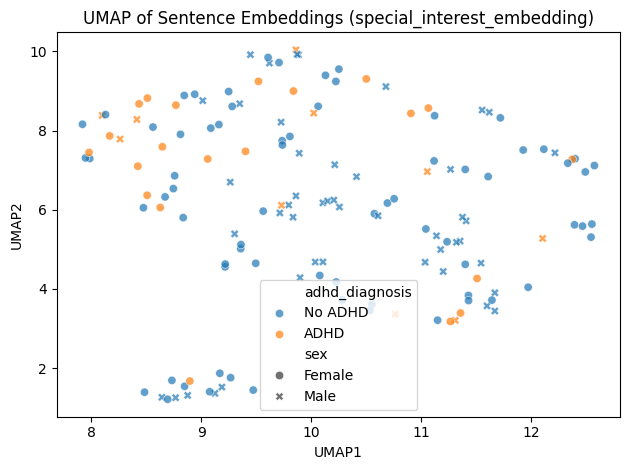

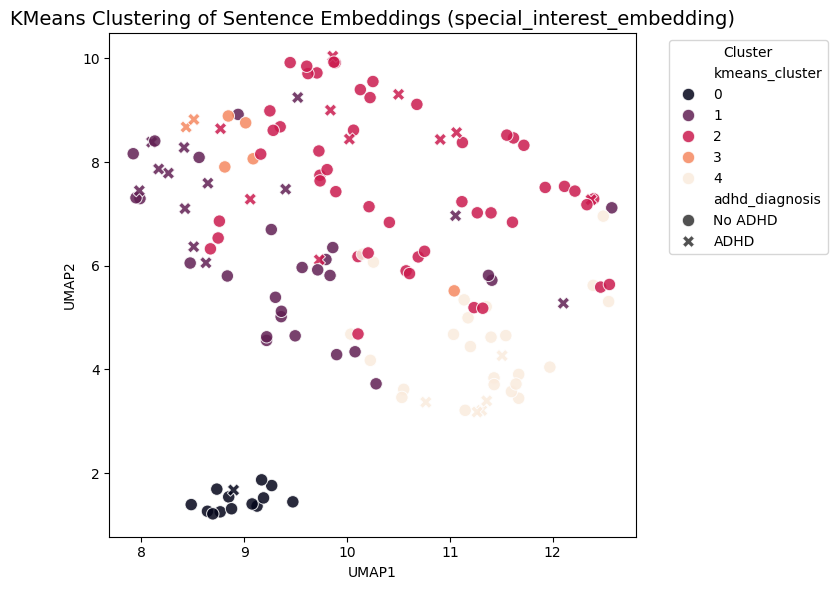

[special_interest_embedding] Avg similarity - ADHD Women: 0.5789303
[special_interest_embedding] Avg similarity - Non-ADHD Women: 0.5700437
[special_interest_embedding] Avg similarity - Women: 0.57416314
[special_interest_embedding] Avg similarity - Men: 0.5697809
[special_interest_embedding] Avg similarity - ADHD: 0.565355
[special_interest_embedding] Avg similarity - Non-ADHD: 0.5730578
Visualizations and clustering for special_interest_embedding completed.



(110, 70)


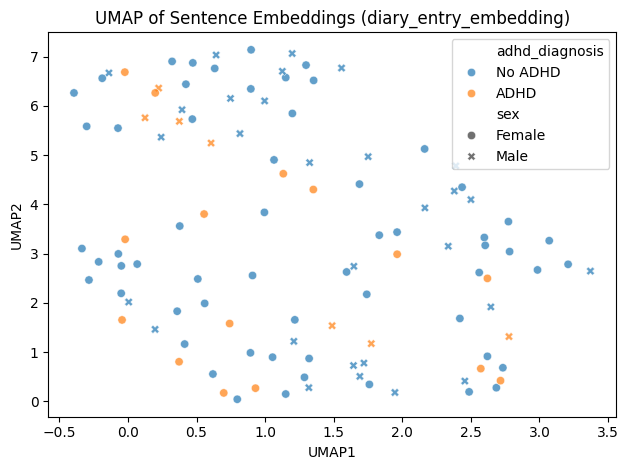

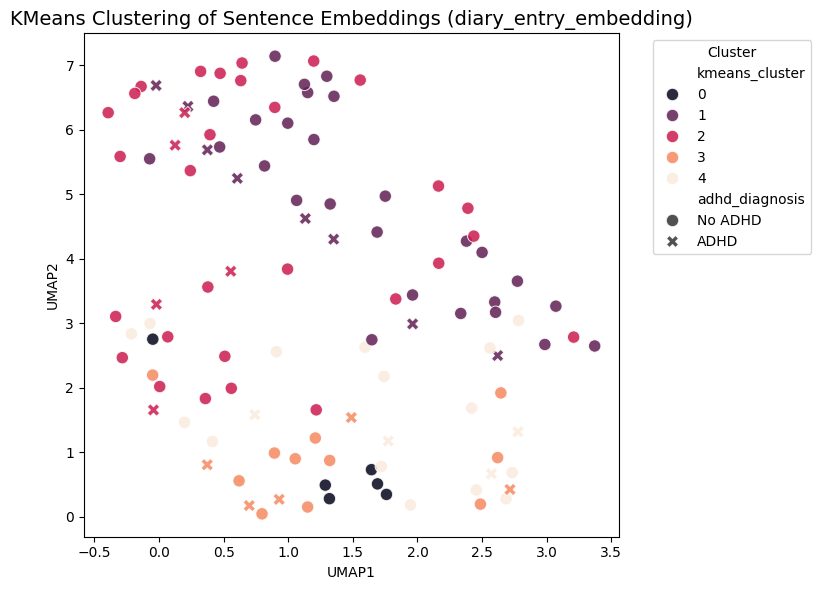

[diary_entry_embedding] Avg similarity - ADHD Women: 0.59959334
[diary_entry_embedding] Avg similarity - Non-ADHD Women: 0.63930583
[diary_entry_embedding] Avg similarity - Women: 0.6255538
[diary_entry_embedding] Avg similarity - Men: 0.6512704
[diary_entry_embedding] Avg similarity - ADHD: 0.612322
[diary_entry_embedding] Avg similarity - Non-ADHD: 0.63926274
Visualizations and clustering for diary_entry_embedding completed.



(92, 70)


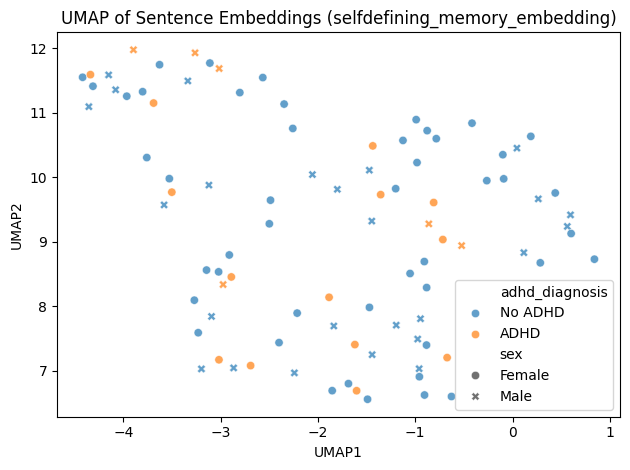

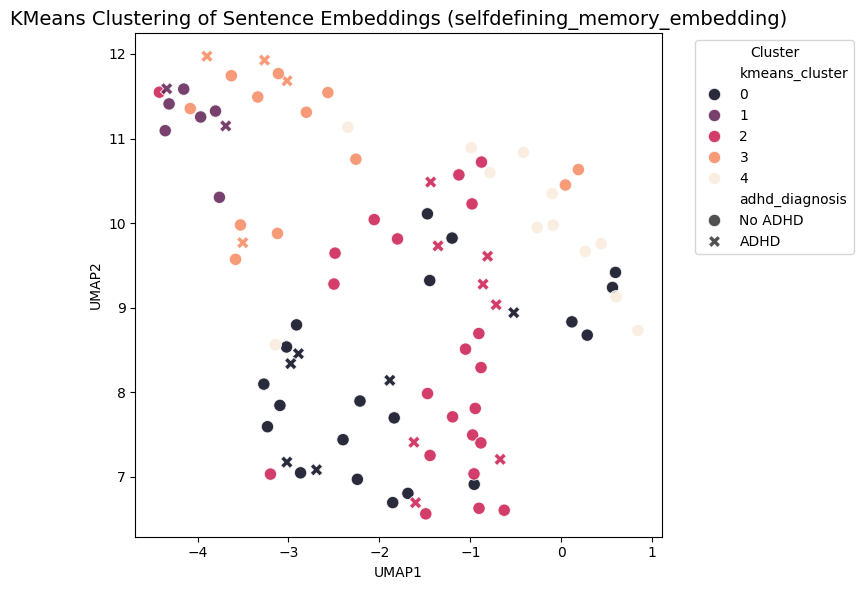

[selfdefining_memory_embedding] Avg similarity - ADHD Women: 0.56723535
[selfdefining_memory_embedding] Avg similarity - Non-ADHD Women: 0.5753272
[selfdefining_memory_embedding] Avg similarity - Women: 0.57584673
[selfdefining_memory_embedding] Avg similarity - Men: 0.573655
[selfdefining_memory_embedding] Avg similarity - ADHD: 0.5749422
[selfdefining_memory_embedding] Avg similarity - Non-ADHD: 0.5743652
Visualizations and clustering for selfdefining_memory_embedding completed.



(64, 70)


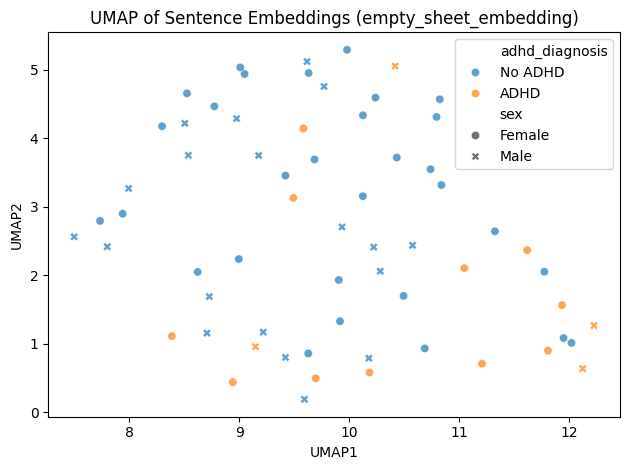

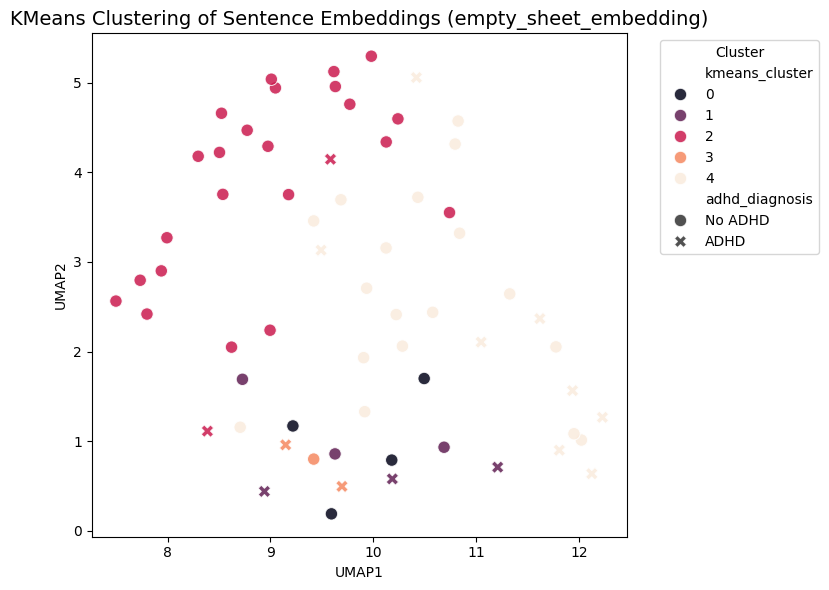

[empty_sheet_embedding] Avg similarity - ADHD Women: 0.55124307
[empty_sheet_embedding] Avg similarity - Non-ADHD Women: 0.5458797
[empty_sheet_embedding] Avg similarity - Women: 0.5559263
[empty_sheet_embedding] Avg similarity - Men: 0.5217463
[empty_sheet_embedding] Avg similarity - ADHD: 0.55176663
[empty_sheet_embedding] Avg similarity - Non-ADHD: 0.5469635
Visualizations and clustering for empty_sheet_embedding completed.



(64, 70)


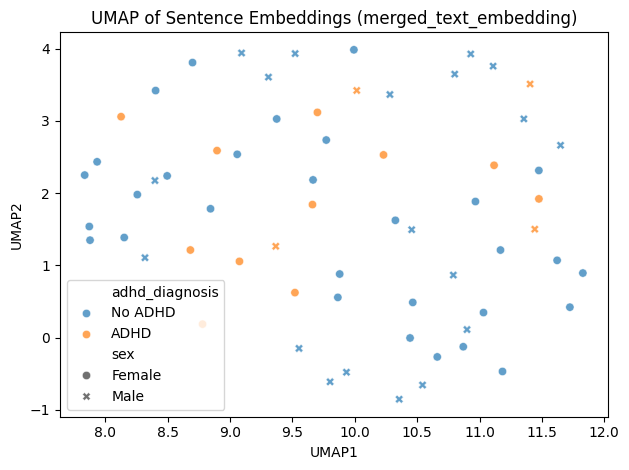

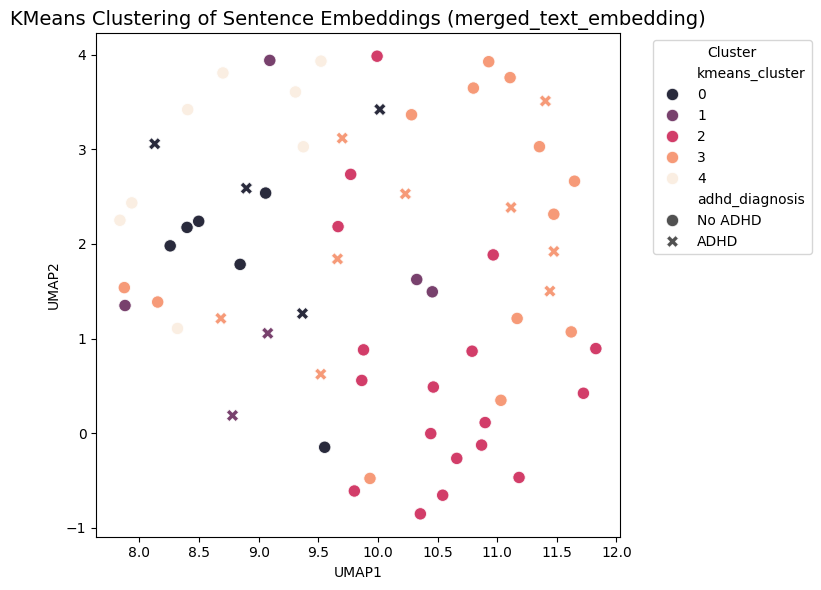

[merged_text_embedding] Avg similarity - ADHD Women: 0.6113208
[merged_text_embedding] Avg similarity - Non-ADHD Women: 0.618345
[merged_text_embedding] Avg similarity - Women: 0.6147233
[merged_text_embedding] Avg similarity - Men: 0.6206176
[merged_text_embedding] Avg similarity - ADHD: 0.60684013
[merged_text_embedding] Avg similarity - Non-ADHD: 0.6210216
Visualizations and clustering for merged_text_embedding completed.





In [9]:
for col in columns:
    df = df[df[col].apply(lambda x: not all(v == 0 for v in x))]
    print(df.shape)
    visualize_umap(col)
    visualize_kmeans(col, n_clusters=5)
    get_similarity(col)
    print(f"Visualizations and clustering for {col} completed.\n")
    print("\n" + "="*50 + "\n")